<a href="https://colab.research.google.com/github/samato0624/DATA602/blob/main/08_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 8**

# **Weeks 10 & 11 - matplotlib & seaborn**
* In this homework assignment, you will explore and analyze a public dataset of your choosing. Since this assignment is “open-ended” in nature, you are free to expand upon the requirements below. However, you must meet the minimum requirments as indicated in each section.


* The preferred method for this analysis is in a .ipynb file. Feel free to use whichever platform of your choosing.  


### **Some data examples:**
•	https://www.data.gov/

•	https://opendata.cityofnewyork.us/

•	https://datasetsearch.research.google.com/

•	https://archive.ics.uci.edu/ml/index.php

### **Resources:**

•	https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

•	https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

•	https://www.data-to-viz.com/



### **Headings or comments**
**You are required to make use of comments, or headings for each section.  You must explain what your code is doing, and the results of running your code.**  Act as if you were giving this assignment to your manager - you must include clear and descriptive information for each section.

### **You may work as a group or indivdually on this assignment.**


# Introduction

In this section, please describe the dataset you are using.  Include a link to the source of this data.  You should also provide some explanation on why you choose this dataset.

The data set I'm using is from kaggle (https://www.kaggle.com/datasets/ashmitcajla/dataset-for-blood-glucose-level-readings?resource=download). This data set is a record of different people who are diabetic and non-diabetic and their blood glucose measurements. I am an expert in medical device software regualtions and I chose this set because in my field I work with diabetic management software that meets the criterion for the FDA medical device definition. This software handles blood glucose measurement data and integrations with physical meters. Ultimately I thought this would be interesting to get a more intuitive understanding of what the data may look like for diabetic vs non-diabetic.

______________
# Data Exploration
Import your dataset into your .ipynb, create dataframes, and explore your data.  

Include:

* Summary statistics means, medians, quartiles,
* Missing value information
* Any other relevant information about the dataset.  



In [2]:
import pandas as pd
# Imort the data.
df = pd.read_csv('https://raw.githubusercontent.com/samato0624/DATA602/main/08_raw_data_2.csv')

# Provide summary statistics.
df[['Age', 'Blood Glucose Level(BGL)','Diastolic Blood Pressure', 'Systolic Blood Pressure']].describe()

,Age,Blood Glucose Level(BGL),Diastolic Blood Pressure,Systolic Blood Pressure
count,16969.000000,16969.000000,16969.000000,16969.000000
mean,30.988862,95.721610,77.173493,118.187165
std,25.585606,42.995198,7.241511,7.700363
min,9.000000,50.000000,60.000000,95.000000
25%,9.000000,68.000000,71.000000,113.000000
50%,14.000000,83.000000,76.000000,119.000000
75%,55.000000,108.000000,83.000000,124.000000
max,77.000000,250.000000,98.000000,145.000000


In [3]:
# Display the missing data.
missing_data_subset = df[df.isnull().any(axis=1)]
print(missing_data_subset.head())

       Age  Blood Glucose Level(BGL)  Diastolic Blood Pressure  \
16969  NaN                       NaN                       NaN   
16970  NaN                       NaN                       NaN   
16971  NaN                       NaN                       NaN   
16972  NaN                       NaN                       NaN   
16973  NaN                       NaN                       NaN   

       Systolic Blood Pressure  Heart Rate  Body Temperature  SPO2  \
16969                      NaN         NaN               NaN   NaN   
16970                      NaN         NaN               NaN   NaN   
16971                      NaN         NaN               NaN   NaN   
16972                      NaN         NaN               NaN   NaN   
16973                      NaN         NaN               NaN   NaN   

       Sweating  (Y/N)  Shivering (Y/N) Diabetic/NonDiabetic (D/N)  
16969              NaN              NaN                        NaN  
16970              NaN              NaN     

Extra information about this data set:
The given records is the combination of true records with synthetic records. The true records
are gathered from the diabetic patients using electronic gadgets to get the readings for body
temperature, heart rate and blood pressure. Also true record from diabetic patients are gathered
either by pricking method or flash glucose monitoring technique used by the diabetic patients.
The non-diabetic people are gathered using electronic gadget like smart wrist bands and based
on their average blood glucose level of 5 days the synthetic blood glucose level is recorded.
For non-diabetic people there is no much variation in the blood glucose levels.

# Data Wrangling

Perform data wrangling.  You are free to use your best judgment here.  If you are stuck, look at previous assignment.

In [4]:
# Choose some columns to keep.
columns_of_interest = ['Age', 'Blood Glucose Level(BGL)','Diastolic Blood Pressure', 'Systolic Blood Pressure', 'Diabetic/NonDiabetic (D/N)']
df = df[columns_of_interest]

# Remove invalid data points.
df = df.drop_duplicates()
df = df.dropna()

# Change some unclear values.
df["Diabetic/NonDiabetic (D/N)"] = df["Diabetic/NonDiabetic (D/N)"].replace({"D": "Diabetic", "N": "Nondiabetic"})
df["Diabetic/NonDiabetic (D/N)"] = df["Diabetic/NonDiabetic (D/N)"].astype(str)

# Removed 5 columns and 2000+ rows. Note that diabetic/nondiabetic is not shown in the summary stats below.
df[['Age', 'Blood Glucose Level(BGL)','Diastolic Blood Pressure', 'Systolic Blood Pressure']].describe()
print(df)

        Age  Blood Glucose Level(BGL)  Diastolic Blood Pressure  \
0       9.0                      79.0                      73.0   
1       9.0                      80.0                      73.0   
2       9.0                      70.0                      76.0   
3       9.0                      70.0                      78.0   
4      66.0                     100.0                      96.0   
...     ...                       ...                       ...   
16964   9.0                      75.0                      87.0   
16965   9.0                      70.0                      79.0   
16966   9.0                      78.0                      82.0   
16967   9.0                      86.0                      86.0   
16968   9.0                      83.0                      85.0   

       Systolic Blood Pressure Diabetic/NonDiabetic (D/N)  
0                        118.0                Nondiabetic  
1                        119.0                Nondiabetic  
2              

# Visualizations

The main purpose of this assignment is to practice creating various visualizations using the matplotlib and seaborn library.

### **Part 1:**
Using matplotlib, create ***two or more plots*** that incorporate at least **5** of the following properties:

Note: these properties vary based on your data.  The goal is to practice creating visualizations and modifying its properties.

*   Use and change a legend position
*   Change a legend font size
*   Place a legend outside of the plot
*   Create a single legend for all subplots
*   Change the title and x/y labels
*   Change the marker, line colors, and line width
*   Add annotations
*   Modify Axis Text Ticks/Labels
*   Change size of axis Labels
*   Your own choice not included above


Plots that you can create **include**:

*   Scatter Plot
*   Bar plot
*   Line Chart
*   Multi Plots (e.g. using .subplot()
*   Histogram

You can add another plot not listed here if it works better for your data.  This is not a complete list of plots to create.

### **Part 2:**

Recreate the visualizations above using the Seaborn library as best as possible.  


**You are required to explain what each of your plots is representing. Plots without comments will not be accepted.**  In addition, please explain the properties you are showcasing.


### **Part 3:**
In a comment or text box, explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.



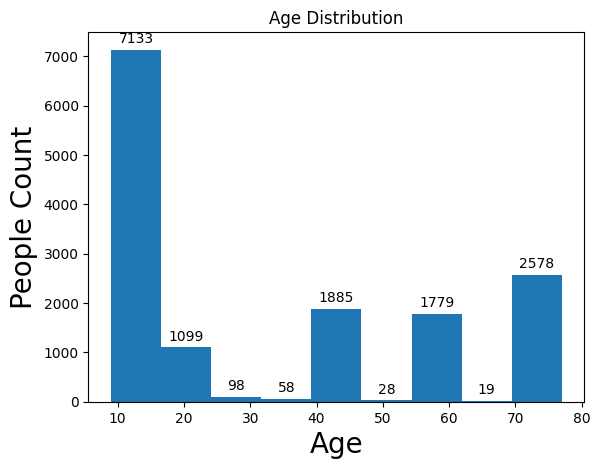

In [5]:
# Part 1
# The following histogram is used to visualize the age distribution within the data.

from matplotlib import pyplot as plt

# Create the histogram
n, bins, bin_group = plt.hist(df.Age, bins=9)

# Set labels and title, adjust the font size of each axis
plt.xlabel('Age', fontsize = 20)
plt.ylabel('People Count', fontsize = 20)
plt.title('Age Distribution')


# Annotate values to the top of each bar
for i in range(len(bin_group)):
    plt.annotate(str(int(n[i])), xy=(bin_group[i].get_x() + bin_group[i].get_width() / 2, bin_group[i].get_height()),
                 xytext=(0, 5), textcoords='offset points', ha='center', fontsize=10)

plt.show()

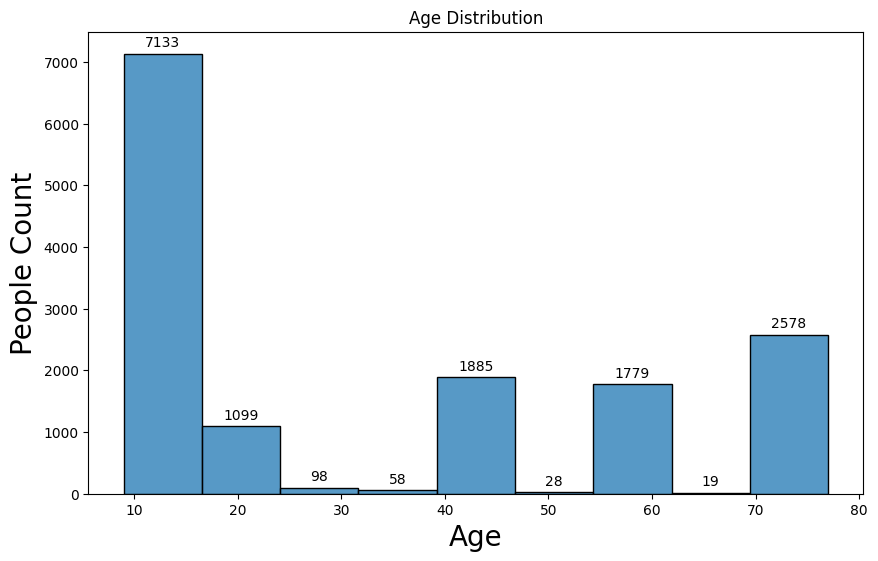

In [6]:
# Part 2
# Recreating the histogram with Seaborn

import seaborn as sns

# Create the histogram
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=9, kde=False, ax=ax)

# Set labels and title, adjust the font size of each axis
ax.set_xlabel('Age', fontsize=20)
ax.set_ylabel('People Count', fontsize=20)
ax.set_title('Age Distribution')

# Annotate values to the top of each bar
for p in ax.patches:
    ax.annotate(str(int(p.get_height())),
                xy=(p.get_x() + p.get_width() / 2., p.get_height()),
                xytext=(0, 5), textcoords='offset points',
                ha='center', fontsize=10)

plt.show()

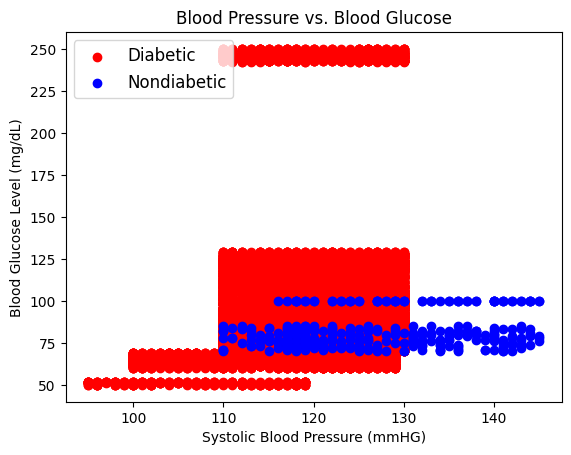

In [7]:
# Part 1
# The following is a scatterplot used to visualize the relationship between blood pressure and blood glucose.

# Separate data for diabetic and nondiabetic
diabetic_data = df[df['Diabetic/NonDiabetic (D/N)'] == 'Diabetic']
non_diabetic_data = df[df['Diabetic/NonDiabetic (D/N)'] == 'Nondiabetic']

# Create a scatterplot of blood pressure vs blood glucose colored by disease state
plt.scatter(diabetic_data['Systolic Blood Pressure'], diabetic_data['Blood Glucose Level(BGL)'], label='Diabetic', color='red')
plt.scatter(non_diabetic_data['Systolic Blood Pressure'], non_diabetic_data['Blood Glucose Level(BGL)'], label='Nondiabetic', color='blue')

# Set labels and title
plt.xlabel('Systolic Blood Pressure (mmHG)')
plt.ylabel('Blood Glucose Level (mg/dL)')
plt.title('Blood Pressure vs. Blood Glucose')

# Create a legend then change its position and font size
plt.legend(loc='upper left', fontsize='large')

plt.show()

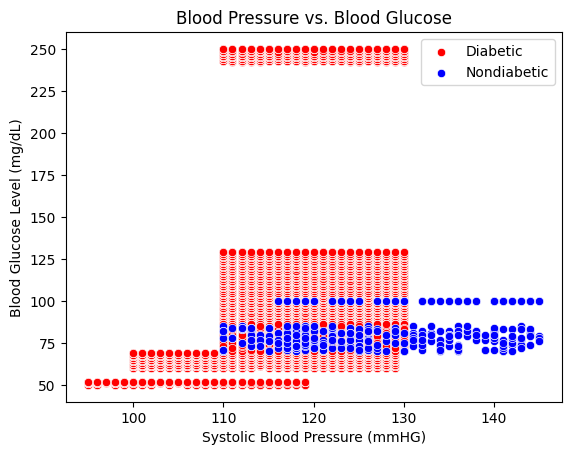

In [14]:
# Part 2
# Recreating the scatterplot with Seaborn

# Separate data for diabetic and non-diabetic
diabetic_data = df[df['Diabetic/NonDiabetic (D/N)'] == 'Diabetic']
non_diabetic_data = df[df['Diabetic/NonDiabetic (D/N)'] == 'Nondiabetic']

# Create a scatterplot of blood pressure vs blood glucose colored by disease state
sns.scatterplot(data=diabetic_data, x='Systolic Blood Pressure', y='Blood Glucose Level(BGL)', label='Diabetic', color='red')
sns.scatterplot(data=non_diabetic_data, x='Systolic Blood Pressure', y='Blood Glucose Level(BGL)', label='Nondiabetic', color='blue')

# Set labels and title
plt.xlabel('Systolic Blood Pressure (mmHG)')
plt.ylabel('Blood Glucose Level (mg/dL)')
plt.title('Blood Pressure vs. Blood Glucose')

plt.show()

While Matplotlib is very customizable, Seaborn does require less code to get something working. With Seaborn you are automatically granted axis labels and a legend, and the graph is already formatted nicely. However since Seaborn is built on top of Matplotlib there are still things like titles and annotations for which you will need to use matplotlib.

# Conclusions  

After exploring your dataset, provide a short summary of what you noticed from this dataset.  

From my data I observed that the age distribution was non-normal data. This data is also very synthetic, much more than the author led on. So I would not be comfortable using this data to make any inferences on the relationship bewteen blood glucose and other health metrics.